**Preprocess censored data**

In [290]:
import pandas as pd
import numpy as np

In [291]:
dolphin_df = pd.read_csv('data/dolphin_df.csv', na_values='nan', index_col=0)
dolphin_df

,birth_date,death_date
1,1977-12-26,1991-04-25
2,1976-03-05,1989-12-19
3,1981-03-04,2003-10-03
4,1997-02-26,2019-06-30
5,1978-05-06,1992-02-06
...,...,...
296,1981-10-22,1989-06-07
297,NaN,2009-08-21
298,1979-02-20,1999-07-31
299,1971-06-08,1990-11-28


In [292]:
def check_observed(row):
    if pd.isna(row['birth_date']):
        flag = 0
    elif pd.isna(row['death_date']):
        flag = 0
    else :
        flag = 1
    return flag
dolphin_df['observed'] = dolphin_df.apply(check_observed, axis = 1)
dolphin_df

,birth_date,death_date,observed
1,1977-12-26,1991-04-25,1
2,1976-03-05,1989-12-19,1
3,1981-03-04,2003-10-03,1
4,1997-02-26,2019-06-30,1
5,1978-05-06,1992-02-06,1
...,...,...,...
296,1981-10-22,1989-06-07,1
297,NaN,2009-08-21,0
298,1979-02-20,1999-07-31,1
299,1971-06-08,1990-11-28,1


**First look at censored data**

In [293]:
dd = pd.read_csv('data/dd.csv')
regime_durations =dd[['ctryname', 'ehead', 'regime', 'start_year', 'duration', 'observed']]
regime_durations.head()

,ctryname,ehead,regime,start_year,duration,observed
0,Afghanistan,Mohammad Zahir Shah,Monarchy,1946,7,1
1,Afghanistan,Sardar Mohammad Daoud,Civilian Dict,1953,10,1
2,Afghanistan,Mohammad Zahir Shah,Monarchy,1963,10,1
3,Afghanistan,Sardar Mohammad Daoud,Civilian Dict,1973,5,0
4,Afghanistan,Nur Mohammad Taraki,Civilian Dict,1978,1,0


In [294]:
# Count censored data
count = len(regime_durations[regime_durations['observed'] == 0])
print(count)

340


**Draw a survival curve**

In [295]:
rossi = pd.read_csv('data/rossi.csv')
prison = rossi[['week', 'arrest']]
prison.head()

,week,arrest
0,20,1
1,17,1
2,25,1
3,52,0
4,52,0


In [296]:
import lifelines
from matplotlib import pyplot as plt

In [297]:
kmf = lifelines.KaplanMeierFitter()
prison_kmf = kmf.fit(durations=prison['week'], event_observed=prison['arrest'])

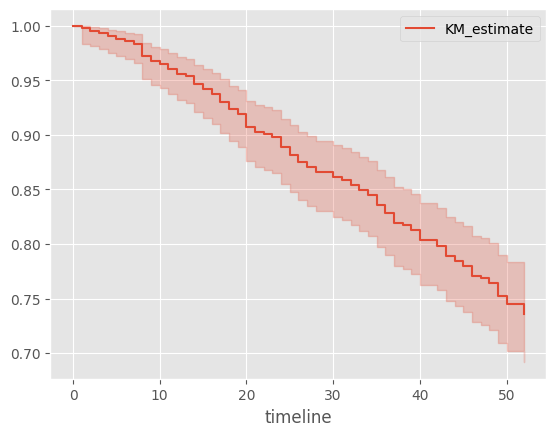

In [298]:
plt.style.use("ggplot")
prison_kmf.plot_survival_function()
plt.show()

**Long live democracy!**

In [299]:
from lifelines import KaplanMeierFitter

In [300]:
kmf = KaplanMeierFitter()
regime_durations_kmf = kmf.fit(
    durations=regime_durations['duration'],
    event_observed=regime_durations['observed']
)

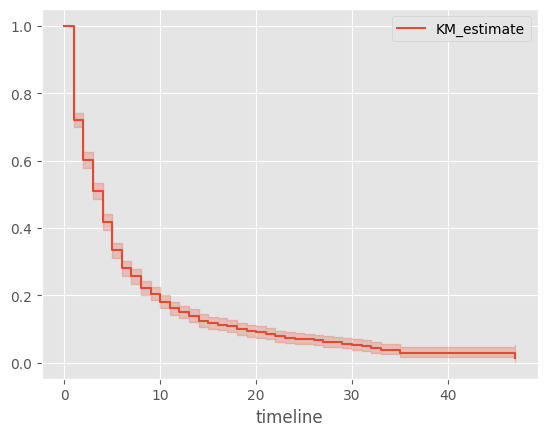

In [301]:
kmf.plot_survival_function()
plt.show()

**Fitting a Kaplan-Meier estimator**

In [302]:
has_pericardial_effusion = pd.read_csv('data/has_pericardial_effusion.csv', index_col=0)
del(has_pericardial_effusion['id'])
has_pericardial_effusion.head()

,survival,observed,age,pericardialeffusion,name
1,52.0,1,62.000,1,name
2,24.0,1,55.000,1,name
3,0.5,0,69.000,1,name
4,0.5,0,62.529,1,name
5,1.0,0,66.000,1,name


In [303]:
none_pericardial_effusion = pd.read_csv('data/none_pericardial_effusion.csv', index_col=0, na_values='NA')
none_pericardial_effusion.head()

,survival,observed,age,pericardialeffusion,name
1,11.0,1,71.0,0,name
2,19.0,1,72.0,0,name
3,16.0,1,55.0,0,name
4,57.0,1,60.0,0,name
5,19.0,0,57.0,0,name


*Heart disease patient survival*

In [304]:
kmf_has_pe = KaplanMeierFitter()
kmf_no_pe = KaplanMeierFitter()

In [305]:
kmf_has_pe.fit(durations=has_pericardial_effusion['survival'], event_observed=has_pericardial_effusion['observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 24 total observations, 12 right-censored observations>

In [306]:
kmf_no_pe.fit(durations=none_pericardial_effusion['survival'], event_observed=none_pericardial_effusion['observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 106 total observations, 30 right-censored observations>

In [307]:
print("The median survival duration (months) of patients with pericardial effusion: ", kmf_has_pe.median_survival_time_)

The median survival duration (months) of patients with pericardial effusion:  27.0


In [308]:
print("The median survival duration (months) of patients without pericardial effusion: ", kmf_no_pe.median_survival_time_)

The median survival duration (months) of patients without pericardial effusion:  31.0


**Visualizing your Kaplan-Meier model**

In [309]:
recur = pd.read_csv('data/patient.csv', index_col=0)
recur.head()

,age,time_0,time_1,censor
1,43,9,56,1
2,43,56,88,1
3,43,0,6,1
4,43,6,9,1
5,43,0,42,1


**Patient soreness treatment**

In [310]:
recur['duration'] = recur['time_1'] - recur['time_0']

In [311]:
kmf = KaplanMeierFitter()
kmf.fit(durations=recur['duration'], event_observed=recur['censor'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 654 total observations, 177 right-censored observations>

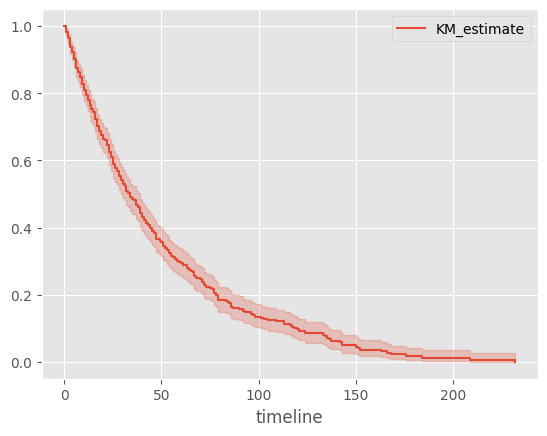

In [312]:
kmf.plot_survival_function()
plt.show()

**Applying survival analysis to groups**

In [313]:
bc_df = pd.read_csv('data/bc_df.csv', index_col = 0, na_values = "NA")
bc_df.head()

,name,political_affiliation,province_territory,appointed_on_advice_of,term,start_date,end_date,reason,diff_days,observed
1,"Austin, Jack",Liberal Party of Canada,British Columbia,"Trudeau, Pierre Elliott",1975.08.19 - 2007.03.02 (Retirement),1975-08-19,2007-03-02,Retirement,11518,True
2,"Barnard, George Henry",Conservative (1867-1942),British Columbia,"Borden, Robert Laird",1917.10.23 - 1945.11.08 (Resignation),1917-10-23,1945-11-08,Resignation,10243,True
3,"Bell (Heath), Ann Elizabeth Haddon",Liberal Party of Canada,British Columbia,"Trudeau, Pierre Elliott",1970.10.07 - 1989.11.29 (Death),1970-10-07,1989-11-29,Death,6993,True
4,"Bostock, Hewitt",Liberal Party of Canada,British Columbia,"Laurier, Wilfrid",1904.06.06 - 1930.04.28 (Death),1904-06-06,1930-04-28,Death,9457,True
5,"Campbell, Larry W.",Liberal Party of Canada,British Columbia,"Martin, Paul Edgar Philippe",2005.08.02 -,2005-08-02,2013-10-01 22:20:10.165196,NaN,2982,False


**Senators' terms in office**

In [314]:
kmf = KaplanMeierFitter()

In [315]:
kmf.fit(
    durations=bc_df['diff_days'], 
    event_observed=bc_df['observed'], 
    label='British Columbia' 
)

<lifelines.KaplanMeierFitter:"British Columbia", fitted with 44 total observations, 5 right-censored observations>

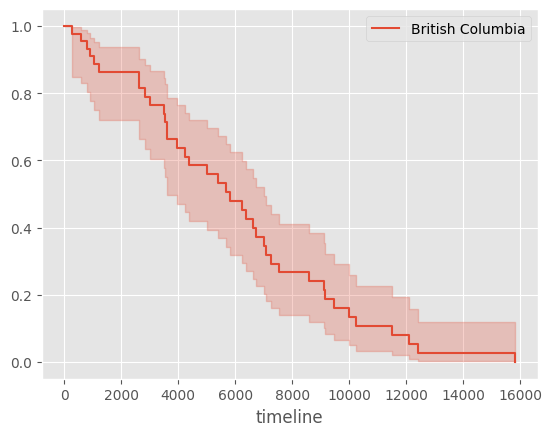

In [316]:
kmf.plot_survival_function()
plt.show()

**Comparing patient soreness treatments**

In [317]:
recur = pd.read_csv('data/recur.csv', index_col = 0)
recur.head()

,age,treat,duration,censor
1,43,0,47,1
2,43,0,32,1
3,43,0,6,1
4,43,0,3,1
5,43,0,42,1


In [318]:
kmf = KaplanMeierFitter()

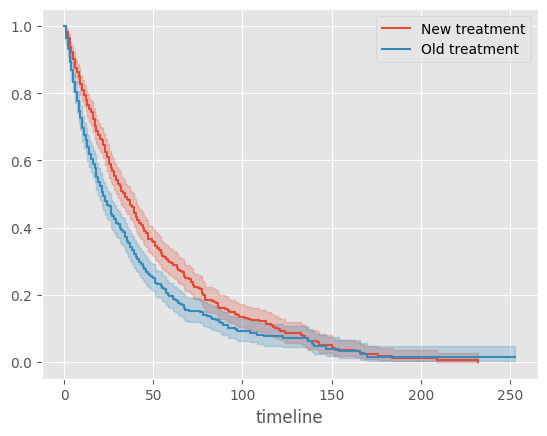

In [319]:
ax = plt.subplot(111)
new = (recur['treat'] == 0)
kmf.fit(
    durations=recur[new]['duration'],
    event_observed=recur[new]['censor'],
    label='New treatment'
)
kmf.plot_survival_function(ax=ax)
old = (recur['treat'] == 1)
kmf.fit(
    durations=recur[old]['duration'], 
    event_observed=recur[old]['censor'], 
    label='Old treatment'
)
kmf.plot_survival_function(ax=ax)
plt.show()

**The log-rank test**

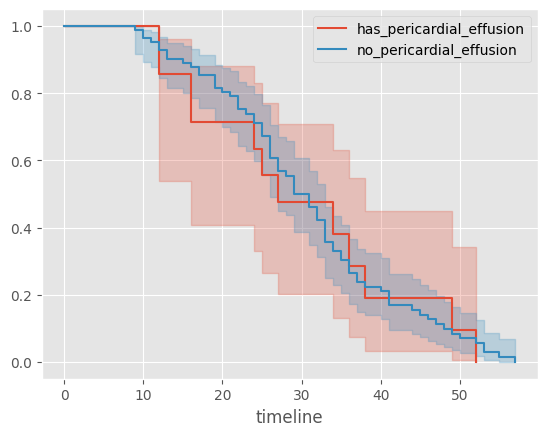

In [320]:
kmf.fit(
    durations=has_pericardial_effusion['survival'],
    event_observed=has_pericardial_effusion['observed'],
    label='has_pericardial_effusion'
)
surv_plot = kmf.plot()
kmf.fit(
    durations=none_pericardial_effusion['survival'],
    event_observed=none_pericardial_effusion['observed'],
    label='no_pericardial_effusion'
)
kmf.plot(ax=surv_plot)
plt.show()

**Log-rank test**

In [321]:
from lifelines.statistics import logrank_test

In [322]:
patient_results = logrank_test(
    durations_A=has_pericardial_effusion['survival'],
    durations_B=none_pericardial_effusion['survival'],
    event_observed_A=has_pericardial_effusion['observed'],
    event_observed_B=none_pericardial_effusion['observed']
)

In [323]:
print(patient_results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.02 0.89      0.17


In [324]:
print(patient_results.p_value)

0.890495240509155


**Fitting the Weibull model**

In [325]:
from lifelines import WeibullFitter
wb = WeibullFitter()

In [326]:
wb.fit(
    durations=prison['week'],
    event_observed=prison['arrest']
)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 432 total observations, 318 right-censored observations>

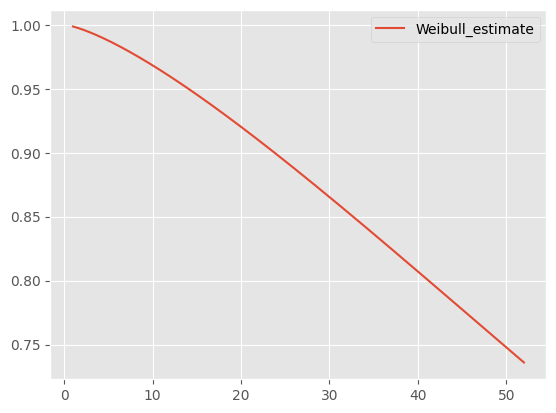

In [327]:
wb.survival_function_.plot()
plt.show()

In [328]:
wb.median_survival_time_

np.float64(94.5561872278691)

**Compare Weibull model parameters**

In [329]:
prison.loc[:, 'paro'] =  [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
prison

C:\Users\DELL\AppData\Local\Temp\ipykernel_9516\3650459278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prison.loc[:, 'paro'] =  [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0

,week,arrest,paro
0,20,1,1
1,17,1,1
2,25,1,1
3,52,0,1
4,52,0,1
...,...,...,...
427,52,0,1
428,52,0,1
429,52,0,1
430,52,0,1


In [330]:
parole = (prison['paro'] == 1)

In [331]:
wb.fit(
    durations=prison[parole]['week'],
    event_observed=prison[parole]['arrest']
)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 267 total observations, 199 right-censored observations>

In [332]:
print("The rho_ parameter of parolee survival function is: ", wb.rho_)

The rho_ parameter of parolee survival function is:  1.4181024400796285


In [333]:
non_parole = (prison['paro'] == 0)
wb.fit(
    durations=prison[non_parole]['week'],
    event_observed=prison[non_parole]['arrest']
)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 165 total observations, 119 right-censored observations>

In [334]:
print("The rho_ parameter of non-parolee survival function is: ", wb.rho_)

The rho_ parameter of non-parolee survival function is:  1.2943809760486589


**Weibull model with covariates**

In [335]:
from lifelines import WeibullAFTFitter
aft = WeibullAFTFitter()

**Analyze heart patients characteristics**

In [336]:
echocardiogram = pd.read_csv('data/echocardiogram.csv')
echocardiogram = echocardiogram.dropna()
heart_patients = echocardiogram[['survival', 'age', 'pericardialeffusion', 'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score', 'wallmotion-index']]
heart_patients = heart_patients.copy()
heart_patients.loc[:, 'observed'] = [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
heart_patients.head()

,survival,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,observed
0,11.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.0
1,19.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,1.0
2,16.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.0
3,57.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,1.0
4,19.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.0


In [337]:
aft.fit(
    df=heart_patients,
    duration_col='survival',
    event_col='observed'
)

<lifelines.WeibullAFTFitter: fitted with 61 total observations, 21 right-censored observations>

In [338]:
print(aft.summary)

                                  coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                             
lambda_ age                   0.004094   1.004103  0.008454       -0.012475   
        epss                 -0.022114   0.978129  0.018199       -0.057784   
        fractionalshortening -0.119929   0.886983  0.709713       -1.510940   
        lvdd                  0.065512   1.067706  0.109837       -0.149765   
        pericardialeffusion   0.025630   1.025962  0.185600       -0.338140   
        wallmotion-index      0.131036   1.140008  0.315619       -0.487566   
        wallmotion-score     -0.009944   0.990106  0.027811       -0.064453   
        Intercept             3.280618  26.592195  0.870307        1.574847   
rho_    Intercept             0.928306   2.530219  0.125634        0.682068   

                              coef upper 95%  exp(coef) lower 95%  \
param   covariate                                            

In [339]:
exp_epss = np.exp(aft.params_.loc['lambda_'].loc['epss'])
print('When EPSS increases by 1, the average survival duration changes by a factor of ', exp_epss)

When EPSS increases by 1, the average survival duration changes by a factor of  0.9781286998367275


**Explore gender-LVDD interaction**

In [340]:
heart_patients.loc[:, 'gender_f'] = [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]

In [341]:
aft.fit(
    df=heart_patients,
    duration_col='survival',
    event_col='observed',
    formula="epss + lvdd*gender_f"
)

<lifelines.WeibullAFTFitter: fitted with 61 total observations, 21 right-censored observations>

In [342]:
print(aft.summary)

                           coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                      
lambda_ Intercept      3.419196  30.544834  0.492444        2.454023   
        epss          -0.019498   0.980691  0.016468       -0.051776   
        lvdd           0.083970   1.087596  0.109935       -0.131499   
        gender_f      -0.064314   0.937711  1.150511       -2.319275   
        lvdd:gender_f  0.017482   1.017636  0.245207       -0.463115   
rho_    Intercept      0.929797   2.533996  0.125426        0.683968   

                       coef upper 95%  exp(coef) lower 95%  \
param   covariate                                            
lambda_ Intercept            4.384369            11.635056   
        epss                 0.012779             0.949542   
        lvdd                 0.299439             0.876780   
        gender_f             2.190647             0.098345   
        lvdd:gender_f        0.498079             0

**Visualization and prediction with Weibull model**

In [343]:
prison = pd.read_csv('data/rossi.csv', index_col=0)
del(prison['race'])
prison

,week,arrest,fin,age,wexp,mar,paro,prio
0,20,1,0,27,0,0,1,3
1,17,1,0,18,0,0,1,8
2,25,1,0,19,1,0,1,13
3,52,0,1,23,1,1,1,1
4,52,0,0,19,1,0,1,3
...,...,...,...,...,...,...,...,...
427,52,0,1,31,1,0,1,3
428,52,0,0,20,0,0,1,1
429,52,0,1,20,1,1,1,1
430,52,0,0,29,1,0,1,3


In [344]:
aft.fit(
    df=prison,
    duration_col='week',
    event_col='arrest'
)

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>

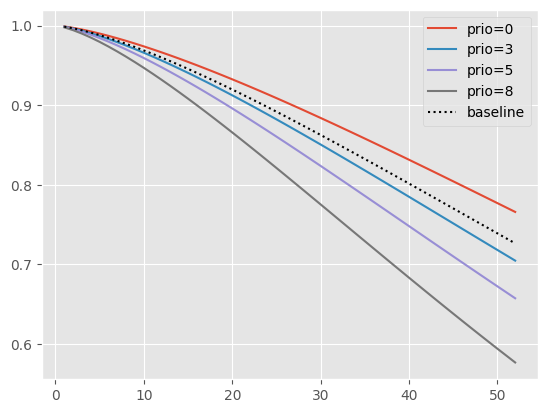

In [345]:
aft.plot_partial_effects_on_outcome(
    covariates = 'prio',
    values=[0, 3, 5, 8]
)
plt.show()

**Predict re-arrest rate**

In [346]:
prison_dict = {
    'week': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'arrest': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'fin': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'age': [23, 24, 22, 41, 41, 35, 18, 29, 24, 35],
    'wexp': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'mar': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'paro': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'prio': [10, 9, 0, 17, 9, 8, 15, 14, 8, 10]
}
prison_new = pd.DataFrame(prison_dict)
prison_new

,week,arrest,fin,age,wexp,mar,paro,prio
0,0,0,0,23,0,0,0,10
1,0,0,0,24,0,0,0,9
2,0,0,0,22,0,0,0,0
3,0,0,0,41,0,0,0,17
4,0,0,0,41,0,0,0,9
5,0,0,0,35,0,0,0,8
6,0,0,0,18,0,0,0,15
7,0,0,0,29,0,0,0,14
8,0,0,0,24,0,0,0,8
9,0,0,0,35,0,0,0,10


In [347]:
aft_pred = aft.predict_median(
    df=prison_new
)
aft_pred

0    45.627352
1    50.655736
2    83.628782
3    59.603596
4    99.921910
5    83.864910
6    27.052565
7    44.787839
8    54.035250
9    73.702670
dtype: float64

In [348]:
print("On average, the median number of weeks for new released convicts to be arrested is: ", np.mean(aft_pred))

On average, the median number of weeks for new released convicts to be arrested is:  62.288061052690956


**Other distributions and model selection**

In [349]:
prison = prison[['week', 'arrest']]
prison

,week,arrest
0,20,1
1,17,1
2,25,1
3,52,0
4,52,0
...,...,...
427,52,0
428,52,0
429,52,0
430,52,0


**How good is the fit?**

In [350]:
from lifelines.plotting import qq_plot

In [351]:
wb = WeibullFitter()

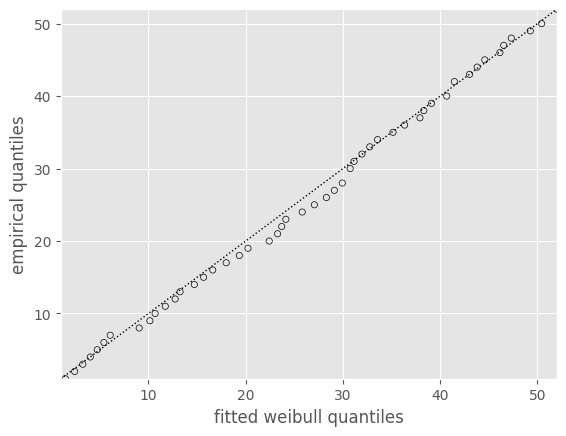

In [352]:
wb.fit(
    durations=prison['week'],
    event_observed=prison['arrest']
)
qq_plot(wb)
plt.show()

**Choose a parametric model**

In [353]:
import lifelines

In [354]:
wb = lifelines.WeibullFitter()
exp = lifelines.ExponentialFitter()
log = lifelines.LogNormalFitter()
logl = lifelines.LogLogisticFitter()

In [355]:
for model in [wb, exp, log]:
    model.fit(heart_patients['survival'], heart_patients['observed'])
    print(model.__class__.__name__, model.AIC_)

WeibullFitter 331.95194834891294
ExponentialFitter 367.02560610624914
LogNormalFitter 334.83975916099007


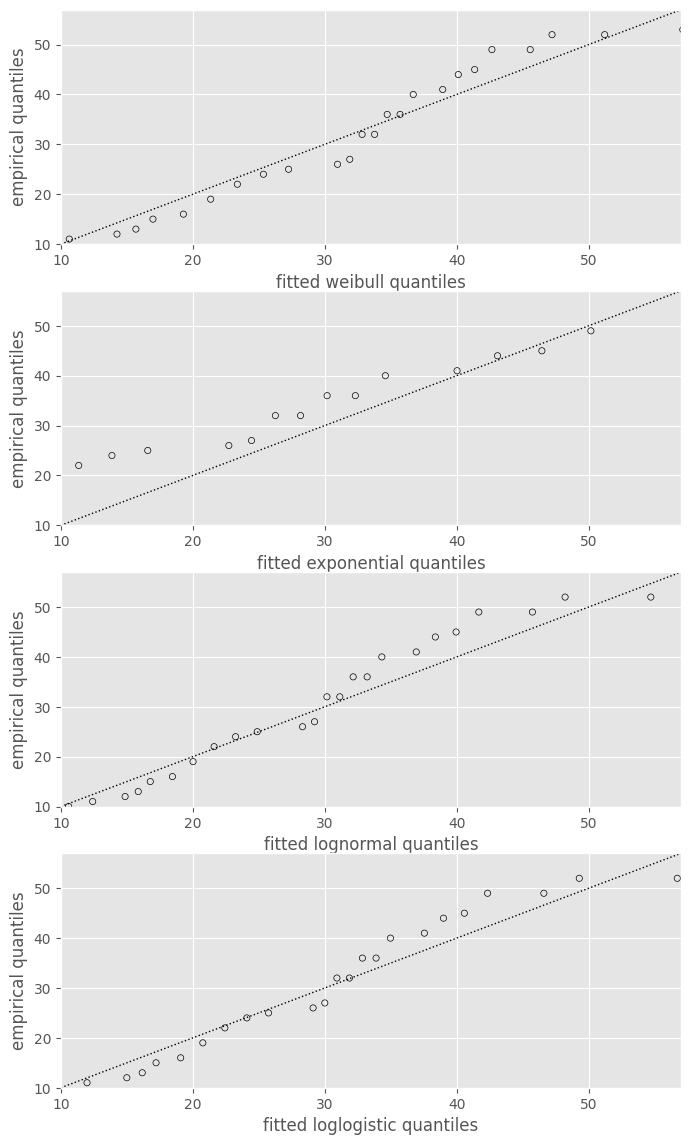

In [356]:
fig, ax = plt.subplots(4, 1, figsize=(8, 14))
for i, model in enumerate([wb, exp, log, logl]):
    model.fit(heart_patients['survival'], heart_patients['observed'])
    qq_plot(model, ax=ax[i])
plt.show()

**Fitting the Cox Proportional Hazards model**

In [357]:
from lifelines import CoxPHFitter

In [358]:
cph = CoxPHFitter()

**Model prison data with Cox PH**

In [359]:
prison = pd.read_csv('data/rossi.csv', index_col=0)
del(prison['race'])
prison

,week,arrest,fin,age,wexp,mar,paro,prio
0,20,1,0,27,0,0,1,3
1,17,1,0,18,0,0,1,8
2,25,1,0,19,1,0,1,13
3,52,0,1,23,1,1,1,1
4,52,0,0,19,1,0,1,3
...,...,...,...,...,...,...,...,...
427,52,0,1,31,1,0,1,3
428,52,0,0,20,0,0,1,1
429,52,0,1,20,1,1,1,1
430,52,0,0,29,1,0,1,3


In [360]:
cph.fit(
    df=prison,
    duration_col='week',
    event_col='arrest'
)

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [361]:
print( cph.summary)

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
fin       -0.365536   0.693825  0.190900       -0.739693        0.008621   
age       -0.056326   0.945231  0.021887       -0.099223       -0.013428   
wexp      -0.156989   0.854714  0.212081       -0.572660        0.258682   
mar       -0.471303   0.624189  0.380268       -1.216615        0.274009   
paro      -0.077919   0.925039  0.195299       -0.460698        0.304861   
prio       0.089662   1.093805  0.028711        0.033389        0.145935   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
fin                   0.477260             1.008659     0.0 -1.914802   
age                   0.905541             0.986662     0.0 -2.573486   
wexp                  0.564023             1.295222     0.0 -0.740230   
mar                   0.29

**Custom Cox PH model**

In [362]:
custom_cph = CoxPHFitter()

In [363]:
custom_cph.fit(
    df=prison,
    duration_col='week',
    event_col='arrest',
    formula="fin + age + prio"
)
print(custom_cph.summary)

               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
fin       -0.346954   0.706838  0.190247       -0.719832        0.025923   
age       -0.067105   0.935097  0.020851       -0.107972       -0.026239   
prio       0.096893   1.101743  0.027253        0.043478        0.150309   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
fin                   0.486834             1.026262     0.0 -1.823703   
age                   0.897653             0.974102     0.0 -3.218397   
prio                  1.044437             1.162193     0.0  3.555273   

                  p   -log2(p)  
covariate                       
fin        0.068197   3.874147  
age        0.001289   9.599426  
prio       0.000378  11.370906  


**Interpreting the Cox PH model**

In [364]:
cph.fit(
    df=prison,
    duration_col='week',
    event_col='arrest'
)
summary_df = cph.summary

In [365]:
summary_df

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
fin,-0.365536,0.693825,0.190900,-0.739693,0.008621,0.477260,1.008659,0.0,-1.914802,0.055518,4.170907
age,-0.056326,0.945231,0.021887,-0.099223,-0.013428,0.905541,0.986662,0.0,-2.573486,0.010068,6.634085
wexp,-0.156989,0.854714,0.212081,-0.572660,0.258682,0.564023,1.295222,0.0,-0.740230,0.459161,1.122930
mar,-0.471303,0.624189,0.380268,-1.216615,0.274009,0.296231,1.315227,0.0,-1.239395,0.215199,2.216256
paro,-0.077919,0.925039,0.195299,-0.460698,0.304861,0.630843,1.356436,0.0,-0.398971,0.689914,0.535511
prio,0.089662,1.093805,0.028711,0.033389,0.145935,1.033953,1.157121,0.0,3.122894,0.001791,9.125163


**Cox PH model survival time**

In [366]:
summary_df["surv_ratio"] = 1/summary_df['exp(coef)']
summary_df

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),surv_ratio
covariate,,,,,,,,,,,,
fin,-0.365536,0.693825,0.190900,-0.739693,0.008621,0.477260,1.008659,0.0,-1.914802,0.055518,4.170907,1.441286
age,-0.056326,0.945231,0.021887,-0.099223,-0.013428,0.905541,0.986662,0.0,-2.573486,0.010068,6.634085,1.057942
wexp,-0.156989,0.854714,0.212081,-0.572660,0.258682,0.564023,1.295222,0.0,-0.740230,0.459161,1.122930,1.169982
mar,-0.471303,0.624189,0.380268,-1.216615,0.274009,0.296231,1.315227,0.0,-1.239395,0.215199,2.216256,1.602080
paro,-0.077919,0.925039,0.195299,-0.460698,0.304861,0.630843,1.356436,0.0,-0.398971,0.689914,0.535511,1.081035
prio,0.089662,1.093805,0.028711,0.033389,0.145935,1.033953,1.157121,0.0,3.122894,0.001791,9.125163,0.914240


In [367]:
print(summary_df.loc['prio', "surv_ratio"])

0.9142399599880766


**Plot covariate effects on survival**

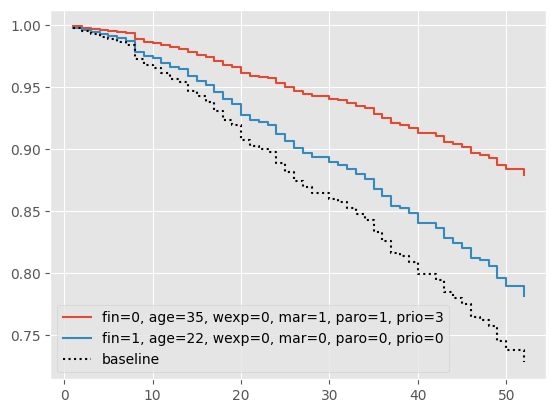

In [368]:
cph.plot_partial_effects_on_outcome(covariates=['fin', 'age', 'wexp', 'mar', 'paro', 'prio'],
         values=[[0, 35, 0, 1, 1, 3], [1, 22, 0, 0, 0, 0]])
plt.show()

**The proportional hazards assumption**

In [369]:
kmf = KaplanMeierFitter()

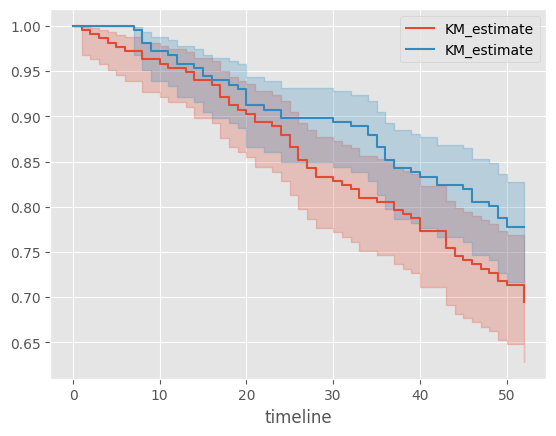

In [370]:
fin_0 = (prison['fin'] == 0)
kmf.fit(
    durations=prison[fin_0]['week'],
    event_observed=prison[fin_0]['arrest']
)
ax = kmf.plot()
fin_1 = (prison['fin'] == 1)
kmf.fit(
    durations=prison[fin_1]['week'],
    event_observed=prison[fin_1]['arrest']
)
kmf.plot(ax=ax)
plt.show()

**Test the PH assumption automatically**

In [371]:
print(cph.check_assumptions(
    training_df=prison,
    p_value_threshold=0.1
))

The ``p_value_threshold`` is set at 0.1. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'age' failed the non-proportional test: p-value is 0.0006.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0050.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

**Predicting with the Cox PH model**

In [372]:
employees = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
employees = employees[['Attrition', 'YearsAtCompany', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'DistanceFromHome', 'PerformanceRating', 'HourlyRate', 'StockOptionLevel']]
condition = (
    employees['Attrition'] == "Yes",
    employees['Attrition'] == "No"
)
choices = [1, 0]
employees['Attrition'] = np.select(condition, choices)
employees

,Attrition,YearsAtCompany,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DistanceFromHome,PerformanceRating,HourlyRate,StockOptionLevel
0,1,6,2,4,1,1,1,3,94,0
1,0,10,3,2,4,3,8,4,61,1
2,1,0,4,3,2,3,2,3,92,0
3,0,8,4,3,3,3,3,3,56,0
4,0,2,1,2,4,3,2,3,40,1
...,...,...,...,...,...,...,...,...,...,...
1465,0,5,3,4,3,3,23,3,41,1
1466,0,7,4,1,1,3,6,3,42,1
1467,0,6,2,2,2,3,4,4,87,1
1468,0,9,4,2,4,2,2,3,63,0


**Employee churn study**

In [373]:
cph.fit(
    df=employees,
    duration_col='YearsAtCompany',
    event_col='Attrition'
)

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [374]:
current_employees = employees.loc[employees['Attrition'] == 0]
current_employees_last_obs = current_employees['YearsAtCompany']

**Predict before they leave!**

In [375]:
cph.predict_survival_function(X=current_employees, conditional_after=current_employees_last_obs)

,1,3,4,5,6,7,8,9,10,11,...,1459,1460,1462,1463,1464,1465,1466,1467,1468,1469
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.994379,0.986798,0.983461,0.988179,0.989854,0.983189,0.937988,0.987251,0.981922,0.959021,...,0.979387,0.958106,0.980243,0.905149,0.983492,0.990813,0.984067,0.982624,0.953854,0.969849
2.0,0.994379,0.951911,0.965986,0.975871,0.981564,0.969540,0.927955,0.973990,0.957653,0.952304,...,0.968125,0.903477,0.954379,0.890122,0.974445,0.978348,0.967549,0.966463,0.946313,0.953502
3.0,0.987684,0.946173,0.944570,0.943300,0.972731,0.955078,0.927955,0.938961,0.935246,0.952304,...,0.952887,0.854664,0.921538,0.890122,0.962168,0.966700,0.924189,0.949717,0.946313,0.931524
4.0,0.980120,0.946173,0.932884,0.937936,0.961795,0.937295,0.916073,0.933201,0.912196,0.944316,...,0.938692,0.806067,0.888041,0.872443,0.950697,0.954573,0.917099,0.905805,0.937356,0.911199
5.0,0.976035,0.939342,0.917089,0.937936,0.955777,0.927565,0.902735,0.933201,0.852580,0.935307,...,0.923959,0.687879,0.888041,0.852749,0.938753,0.922485,0.917099,0.898630,0.927264,0.890255
6.0,0.971381,0.931628,0.902392,0.931549,0.947582,0.914381,0.895570,0.926346,0.842954,0.930448,...,0.885207,0.669800,0.888041,0.842237,0.907154,0.917202,0.908673,0.898630,0.921828,0.835918
7.0,0.966321,0.927463,0.887155,0.924332,0.939894,0.902082,0.887442,0.918605,0.842954,0.924920,...,0.878859,0.669800,0.888041,0.830367,0.901951,0.917202,0.899178,0.890106,0.915646,0.827122
8.0,0.960901,0.922721,0.847169,0.920435,0.931858,0.889296,0.878643,0.914426,0.831563,0.918916,...,0.878859,0.648758,0.888041,0.817586,0.901951,0.910910,0.894061,0.880504,0.908937,0.827122
9.0,0.954958,0.917566,0.840631,0.915995,0.910437,0.855571,0.869265,0.909669,0.818785,0.912494,...,0.871311,0.625614,0.888041,0.804043,0.895756,0.903803,0.888242,0.875332,0.901768,0.816702


In [376]:
pred = cph.predict_median(X=current_employees, conditional_after=current_employees_last_obs)

In [377]:
# Print the smallest median remaining time
print(min(pred))

2.0
